<a href="https://colab.research.google.com/github/shintiayulitasari/PSDS_Kelas_Dasar/blob/main/Mini_Project_Kelas_Dasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The World Happiness Report



##Latar Belakang Dataset

The world happiness report adalah survei tentang keadaan kebahagiaan secara global. Laporan pertama diterbitkan pada 2012, kedua pada 2013, ketiga pada 2015, dan keempat pada pembaharuan 2016. Laporan ini mendapat pengakuan global karena pemerintah, organisasi, dan masyarakat sipil semakin menggunakan indikator kebahagiaan untuk menginformasikan keputusan pembuatan kebijakan mereka. Laporan meninjau keadaan kebahagiaana di dunia saat ini.

Skor dan peringkat kebahagiaan menggunakan data dari Gallup World Poll. Skor didasarkan pada jawaban atas pertanyaan evaluasi kehidupan utama yang diajukan dalam jajak pendapat. Pertanyaan ini, yang dikenal sebagai tangga Cantril, meminta responden untuk memikirkan tangga dengan kemungkinan kehidupan terbaik bagi mereka adalah 10 dan kemungkinan kehidupan terburuk adalah 0 dan untuk menilai kehidupan mereka sendiri saat ini pada skala itu.

Kolom yang mengikuti skor kebahagiaan memperkirakan sejauh mana masing-masing dari enam faktor - produksi ekonomi, dukungan sosial, harapan hidup, kebebasan, tidak adanya korupsi, dan kemurahan hati - berkontribusi membuat evaluasi kehidupan lebih tinggi di setiap negara daripada di Dystopia, sebuah negara dengan hipotesis yang memiliki nilai sama dengan rata-rata nasional terendah di dunia untuk masing-masing dari enam faktor. Mereka tidak berdampak pada skor total yang dilaporkan untuk setiap negara, tetapi mereka menjelaskan mengapa beberapa negara memiliki peringkat lebih tinggi daripada yang lain.

Pada mini project ini, Saya akan menggunakan dataset laporan tahun 2019.

## Pertanyaan Analisis

Faktor apa yang paling mempengaruhi tingkat kebahagiaan di dunia pada tahun 2019?

##EDA (Exploratory Data Analysis)

In [159]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [160]:
df = pd.read_csv('/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Tujuan analisis data : Melakukan analisis untuk memperoleh faktor yang paling mempengaruhi tingkat kebahagiaan.

Variabel-variabel yang terdapat pada dataset ini adalah sebagai berikut:
1. Country or region = negara atau wilayah milik negara
2. Overall rank = Peringkat negara berdasarkan Skor Kebahagiaan
3. Score = Sebuah metrik yang diukur pada tahun 2019 dengan mengajukan pertanyaan kepada orang-orang yang dijadikan sampel: "Bagaimana Anda menilai kebahagiaan Anda dalam skala 0 hingga 10 di mana 10 adalah yang paling bahagia."
4. GDP per capita = Sejauh mana kontribusi GDP terhadap perhitungan Skor Kebahagiaan.
5. Social support = Sejauh mana Keluarga atau dukungan sosial berkontribusi dalam penghitungan Skor Kebahagiaan
6. Healthy life expectancy = Sejauh mana Angka Harapan Hidup berkontribusi terhadap perhitungan Skor Kebahagiaan
7. Freedom to make life choices = Sejauh mana Kebebasan berkontribusi pada perhitungan Happiness Score.
8. Generosity = Sejauh mana Kedermawanan berkontribusi dalam penghitungan Skor Kebahagiaan.
9. Perceptions of corruption = Sejauh mana Persepsi Korupsi berkontribusi terhadap Skor Kebahagiaan.

Variabel data set:

In [161]:
Data = pd.read_csv('/2019.csv')
Data["year"]= 2019
Data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [162]:
# Mengubah nama setiap kolom terkhusus kolom yang akan dianalisis
Data.rename(columns={'Overall rank': 'Rank', 
                      'Country or region': 'Country',
                      'Healthy life expectancy': 'Life Expectancy',
                      'Freedom to make life choices': 'Freedom'}, 
             inplace=True)
Data.columns

Index(['Rank', 'Country', 'Score', 'GDP per capita', 'Social support',
       'Life Expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption',
       'year'],
      dtype='object')

In [163]:
Data.dtypes

Rank                           int64
Country                       object
Score                        float64
GDP per capita               float64
Social support               float64
Life Expectancy              float64
Freedom                      float64
Generosity                   float64
Perceptions of corruption    float64
year                           int64
dtype: object

In [164]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       156 non-null    int64  
 1   Country                    156 non-null    object 
 2   Score                      156 non-null    float64
 3   GDP per capita             156 non-null    float64
 4   Social support             156 non-null    float64
 5   Life Expectancy            156 non-null    float64
 6   Freedom                    156 non-null    float64
 7   Generosity                 156 non-null    float64
 8   Perceptions of corruption  156 non-null    float64
 9   year                       156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


In [165]:
Data.isnull().sum()

Rank                         0
Country                      0
Score                        0
GDP per capita               0
Social support               0
Life Expectancy              0
Freedom                      0
Generosity                   0
Perceptions of corruption    0
year                         0
dtype: int64

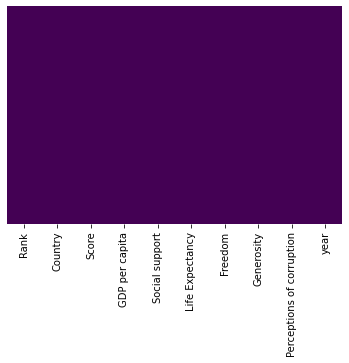

In [166]:
sns.heatmap(Data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Tidak ada kolom-kolom dengan data kosong.

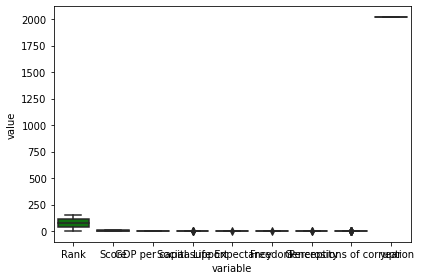

In [167]:
AllData=Data.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(AllData))
plt.tight_layout()

Semua kolom numeric terdapat outlier.

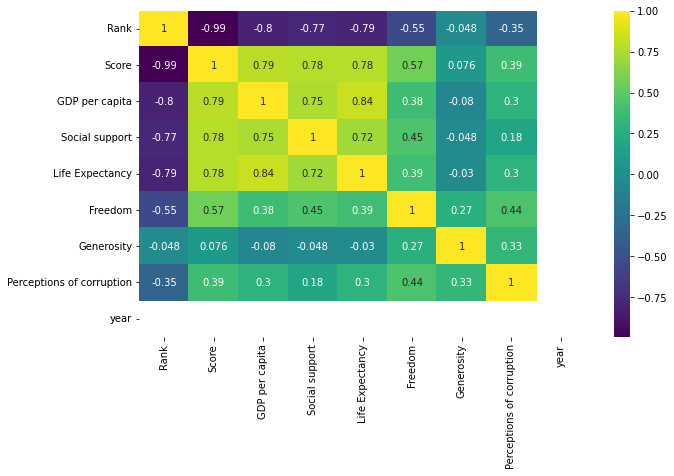

In [168]:
k = len(AllData.columns)
cm = AllData.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Plot tersebut untuk melihat korelasi data yang bisa dilihat dari perbedaan atau kedalaman warna.
Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

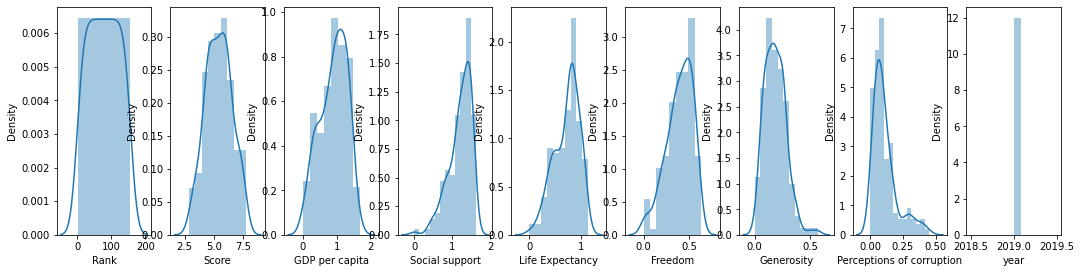

In [169]:
l = AllData.columns.values
number_of_columns=len(AllData.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(AllData[l[i]],kde=True) 

Plot ini untuk melihat apakah variabel-variabel pada dataset berdistribusi normal. Variabel-variabel score, GDP_per_Capita, Social_Support, Health, Freedom cenderung memiliki skewnes positif. Itu berarti berarti ekor distribusi berada di sebelah kanan nilai terbanyak.

## Data Preparation

Untuk menjawab pertanyaan analisis, menyelekasi dahulu kolom yang kurang informatif terhadap pertanyaan. Kolom yang perlu dihapus, yaitu rank, score, year.

In [170]:
df=Data.drop(columns=['Rank','Score','year'])
df.head()

,Country,GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298


In [171]:
df.isnull().sum()

Country                      0
GDP per capita               0
Social support               0
Life Expectancy              0
Freedom                      0
Generosity                   0
Perceptions of corruption    0
dtype: int64

In [172]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

GDP per capita               0.62975
Social support               0.39675
Life Expectancy              0.33400
Freedom                      0.19925
Generosity                   0.13950
Perceptions of corruption    0.09425
dtype: float64


In [173]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,Country,GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption
3,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
9,Austria,1.376,1.475,1.016,0.532,0.244,0.226
11,Costa Rica,1.034,1.441,0.963,0.558,0.144,0.093
12,Israel,1.276,1.455,1.029,0.371,0.261,0.082
14,United Kingdom,1.333,1.538,0.996,0.450,0.348,0.278
...,...,...,...,...,...,...,...
147,Botswana,1.041,1.145,0.538,0.455,0.025,0.100
149,Malawi,0.191,0.560,0.495,0.443,0.218,0.089
150,Yemen,0.287,1.163,0.463,0.143,0.108,0.077
152,Tanzania,0.476,0.885,0.499,0.417,0.276,0.147


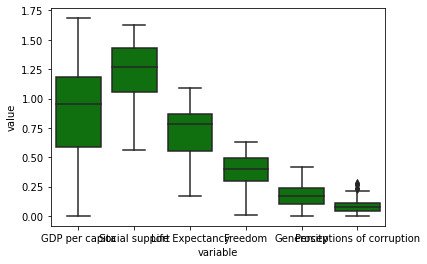

In [174]:
df_clear=df_clear.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df_clear))
plt.show()

In [175]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption
0,0.819477,1.000000,0.932609,0.935588,0.844869,0.424460
1,0.817102,0.859962,0.921739,0.840580,0.582339,0.812950
2,0.614014,0.828008,0.864130,0.882448,0.343675,0.334532
3,0.757720,0.841165,0.935870,0.581320,0.622912,0.294964
4,0.791568,0.919173,0.900000,0.708535,0.830549,1.000000
...,...,...,...,...,...,...
129,0.618171,0.549812,0.402174,0.716586,0.059666,0.359712
130,0.113420,0.000000,0.355435,0.697262,0.520286,0.320144
131,0.170428,0.566729,0.320652,0.214171,0.257757,0.276978
132,0.282660,0.305451,0.359783,0.655395,0.658711,0.528777


## Data Visualization

In [215]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [226]:
trace1 = go.Scatter(x = df['Country'],
                    y = df['GDP per capita'],
                    mode = "lines+markers",
                    name = "GDP per capita",
                    marker = dict(color = 'blue'),
                    text= df.Country)

trace2 = go.Scatter(x = df['Country'],
                    y = df['Social support'],
                    mode = "lines+markers",
                    name = "Social support",
                    marker = dict(color = 'green'),
                    text= df.Country)

trace3 = go.Scatter(x = df['Country'],
                    y = df['Life Expectancy'],
                    mode = "lines+markers",
                    name = "Life Expectancy",
                    marker = dict(color = 'black'),
                    text= df.Country)

trace4 = go.Scatter(x = df['Country'],
                    y = df['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'red'),
                    text= df.Country)

trace5 = go.Scatter(x = df['Country'],
                    y = df['Generosity'],
                    mode = "lines+markers",
                    name = "Generosity",
                    marker = dict(color = 'yellow'),
                    text= df.Country)

trace6 = go.Scatter(x = df['Country'],
                    y = df['Perceptions of corruption'],
                    mode = "lines+markers",
                    name = "Perceptions of corruption",
                    marker = dict(color = 'purple'),
                    text= df.Country)

data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = dict(title = 'Faktor Yang Mempengaruhi Tingkat Kebahagiaan di Dunia',
              xaxis= dict(title= 'Country',ticklen= 6,zeroline= False),
              yaxis= dict(title= 'Happiness',ticklen= 6,zeroline= False),
              hovermode='x'
             )
fig = dict(data = data, layout = layout)
iplot(fig)